In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns 
plt.style.use('seaborn')
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Import Cleaned/Processed Data for Modeling

In [5]:
data = pd.read_csv('house_clean.csv')

In [20]:
data = sm.add_constant(data)

In [54]:
data

,const,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,1.0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,1.0,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,1.0,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,1.0,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,1.0,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,1.0,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,235.294118
19707,1.0,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,173.160173
19708,1.0,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,394.216667
19709,1.0,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,250.000000


In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [64]:
X = data.drop(['price', 'sqft_lot', 'sqft_lot15', 'waterfront'], axis=1)
y = data['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [136]:
lm = sm.OLS(y_train, X_train)
model_2 = lm.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.066e+04
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:13:45   Log-Likelihood:            -1.9509e+05
No. Observations:               15768   AIC:                         3.902e+05
Df Residuals:                   15753   BIC:                         3.903e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.844e+06   9.74e+05      2.919      0.004    9.34e+05    4.75e+06
bedrooms        7169.3635    691.708     10.365      0.000    5813.536    8525.191
bathrooms       1.384e+04   1136.560     12.176      0.000    1.16e+04    1.61e+04
sqft_living      117.0947      0.934    125.368      0.000     115.264     118.925
floors          3941.2694   1240.144      3.178      0.001    1510.445    6372.094
view            8960.9283    809.059     11.076      0.000    7375.081    1.05e+04
condition       1.061e+04    779.902     13.601      0.000    9078.820    1.21e+04
grade           2.596e+04    779.421     33.306      0.000    2.44e+04    2.75e+04
sqft_above        57.2190      0.855     66.953      0.000      55.544      58.894
sqft_basement     59.8754      0.981     61.019      0.000      57.952      61.799
yr_built        -395.1789     24.820    -15.921      0.000    -443.830    -346.528
zipcode          -49.9572     11.066     -4.514      0.000     -71.648     -28.266
lat             1.391e+05   4007.152     34.703      0.000    1.31e+05    1.47e+05
long            3.505e+04   4235.158      8.276      0.000    2.67e+04    4.34e+04
sqft_living15      6.0686      1.289      4.709      0.000       3.542       8.595
price_per_sqft  1296.7436      6.702    193.499      0.000    1283.608    1309.879
==============================================================================
Omnibus:                     2967.998   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11733.064
Skew:                          -0.895   Prob(JB):                         0.00
Kurtosis:                       6.828   Cond. No.                     4.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.88e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

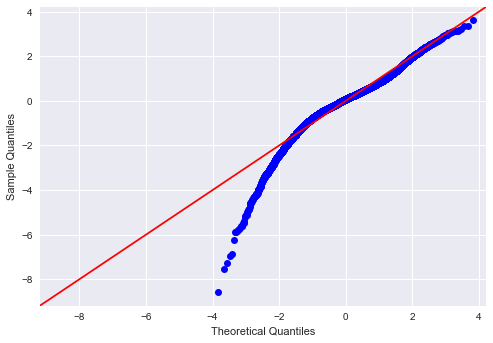

In [67]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [137]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_2.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_2.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_2.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_2.predict(X_test))))
print('10 Cross Validation R^2 score for train:', cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2').mean())
print('10 Cross Validation R^2 score for test:', cross_val_score(linreg, X_test, y_test, cv=10, scoring='r2').mean())

MSE for train set: 57170.64030443462
MSE for test set: 59070.61583796993
MSE difference: -1899.9755335353111
10 Cross Validation R^2 score for train: 0.9040779788228607
10 Cross Validation R^2 score for test: 0.8995918561509834


In [142]:
X.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'price_per_sqft'],
      dtype='object')

In [79]:
neededCols = ['const', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'price_per_sqft']

In [80]:
dataForprediction = data[neededCols]

In [135]:
predictedDatas=[]
for  row in range(0,len(dataForprediction)):
    a=(model_2.predict([[dataForprediction['bedrooms'].values[row],
                       dataForprediction['bathrooms'].values[row],
                       dataForprediction['sqft_living'].values[row],
                       dataForprediction['floors'].values[row],
                       dataForprediction['view'].values[row],
                       dataForprediction['condition'].values[row],
                       dataForprediction['grade'].values[row],
                       dataForprediction['sqft_above'].values[row],
                       dataForprediction['sqft_basement'].values[row],
                       dataForprediction['yr_built'].values[row],
                       dataForprediction['zipcode'].values[row],
                       dataForprediction['lat'].values[row],
                       dataForprediction['long'].values[row],
                       dataForprediction['sqft_living15'].values[row],
                       dataForprediction['const'].values[row],
                       dataForprediction['price_per_sqft'].values[row]
                      ]]))
    a=round(a[0],0)
    predictedDatas.append(a)

In [149]:
prediction_accuracy = dataForprediction.price.values
prediction_accuracy = pd.DataFrame(prediction_accuracy, columns=['Real_price'])
prediction_accuracy['predicted_prices'] = predictedDatas
prediction_accuracy['difference'] = abs(prediction_accuracy['Real_price'] - prediction_accuracy['predicted_prices'])
prediction_accuracy

,Real_price,predicted_prices,difference
0,221900,47128708.0,46906808.0
1,538000,104403373.0,103865373.0
2,180000,76448114.0,76268114.0
3,604000,58331178.0,57727178.0
4,510000,83391053.0,82881053.0
...,...,...,...
19706,360000,67820932.0,67460932.0
19707,400000,112122516.0,111722516.0
19708,402101,26977611.0,26575510.0
19709,400000,66487885.0,66087885.0
